In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for web scrapping
import requests
from bs4 import BeautifulSoup 
import re
import csv


In [2]:
rates=[]
statu=[]
Area=[]
Ratepersqft=[]
localities=[]
possession=[]
new_resale=[]
propert=[]
buildername=[]
RERA=[]
Bathrooms=[]

for i in range(1,50):
    URL='https://www.makaan.com/listings?beds=1,2,3,3plus&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Hyderabad&cityId=12&templateId=MAKAAN_CITY_LISTING_BUY&page={}'.format(i)
    page = requests.get(URL)
    content=page.content
    soup = BeautifulSoup(content,'html.parser')
    
    PRICE=soup.find_all('td',class_='price')
    for i in range(len(PRICE)):
        rates.append(PRICE[i].text)
        
    
    status=soup.find_all('td',class_="val")
    for i in range(len(status)):
        statu.append(status[i].text)   
    
    
    area=soup.find_all('td',class_="size")
    for i in range(len(area)):
        Area.append(area[i].text)
    
    
    ratepersqft=soup.find_all('td',class_="lbl rate")
    for i in range(len(ratepersqft)):
        Ratepersqft.append(ratepersqft[i].text)

    
   
    
    property_type = soup.find_all('div',class_='title-line')
    for i in range(len(property_type)):
        propert.append(property_type[i].text)
   

    locality = soup.find_all('span',itemprop='addressLocality')
    for i in range(len(locality)):
        localities.append(locality[i].text)
        
    


    BULIDER=soup.find_all('span',itemprop="name")
    for i in range(len(BULIDER)):
        buildername.append(BULIDER[i].text)
    
    for i in soup.find_all('div',class_='title-line'):
        info=i.find('div',class_='rera-tag-new')
        if info is None:
            RERA.append('not approval by RERA')
        else:
            RERA.append('approval by RERA')
    

In [3]:
print(len(rates))
print(len(statu))
print(len(Area))
print(len(Ratepersqft))
print(len(localities))

print(len(propert))
print(len(buildername))
print(len(RERA))

980
980
980
980
980
980
980
980


# creating dataframe 

In [4]:
df=pd.DataFrame({'property_type':propert,'seller':buildername,'status':statu,'rate per sqft':Ratepersqft,'price':rates,'area':Area,'location':localities,
                 'RERA':RERA})

In [5]:
df.head()

,property_type,seller,status,rate per sqft,price,area,location,RERA
0,2 BHK Apartment in ELV ELV Cosmopolis,ELV Projects,Under Construction,"3,800 / sq ft",53.01 L,1395,Adibatla,approval by RERA
1,4 BHK Villa in Vajra Nature City,Vajra Builders And Developers,Under Construction,"7,000 / sq ft",1.61 Cr,2300,Bachupally,approval by RERA
2,3 BHK Apartment in GHR Titania,GHR Infra,Under Construction,"6,749 / sq ft",1.19 Cr,1770,Kondapur,approval by RERA
3,3 BHK Apartment in Hallmark Treasor,Hallmark Builders,Under Construction,"6,999 / sq ft",2.68 Cr,3830,Gandipet,approval by RERA
4,3 BHK Apartment in Sumadhura The Olympus,Sumadhura Infracon Pvt Ltd,Under Construction,"7,499 / sq ft",1.25 Cr,1670,Nanakramguda,approval by RERA


In [6]:
df.shape

(980, 8)

In [7]:
df.to_csv('realestates.csv')

In [5]:
df = pd.read_csv('realestates.csv')

In [6]:
df

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA
0,0,2 BHK Apartment in ELV ELV Cosmopolis,ELV Projects,Under Construction,"3,800 / sq ft",53.01 L,1395,Adibatla,approval by RERA
1,1,4 BHK Villa in Vajra Nature City,Vajra Builders And Developers,Under Construction,"7,000 / sq ft",1.61 Cr,2300,Bachupally,approval by RERA
2,2,3 BHK Apartment in GHR Titania,GHR Infra,Under Construction,"6,749 / sq ft",1.19 Cr,1770,Kondapur,approval by RERA
3,3,3 BHK Apartment in Hallmark Treasor,Hallmark Builders,Under Construction,"6,999 / sq ft",2.68 Cr,3830,Gandipet,approval by RERA
4,4,3 BHK Apartment in Sumadhura The Olympus,Sumadhura Infracon Pvt Ltd,Under Construction,"7,499 / sq ft",1.25 Cr,1670,Nanakramguda,approval by RERA
...,...,...,...,...,...,...,...,...,...
975,975,6 BHK Independent House,seller,Ready to move,"5,142 / sq ft",1.8 Cr,3500,Kukatpally,not approval by RERA
976,976,2 BHK Apartment,seller,Ready to move,"3,800 / sq ft",38 L,1000,Gandi Maisamma,not approval by RERA
977,977,2 BHK Apartment,seller,Ready to move,"7,073 / sq ft",87 L,1230,Manikonda,not approval by RERA
978,978,3 BHK Villa,seller,Under Construction,"3,653 / sq ft",95 L,2600,Mokila,not approval by RERA


# Identifying missing values in columns

In [13]:
df.isnull().sum(axis=0)

Unnamed: 0       0
property_type    0
seller           0
status           0
rate per sqft    0
price            0
area             0
location         0
RERA             0
dtype: int64

# Identifying missing values in columns

In [14]:
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
975    0
976    0
977    0
978    0
979    0
Length: 980, dtype: int64

In [15]:
df.property_type.value_counts()

2 BHK Apartment                                                  121
3 BHK Apartment                                                   57
3 BHK Apartment in Engineers Sri Tirumala Millennium Phase II     50
3 BHK Independent House                                           27
4 BHK Independent House                                           22
                                                                ... 
2 BHK Apartment in Om Omkar Heights                                1
3 BHK Apartment in Kalpataru Avante                                1
3 BHK Apartment in Hallmark Tranquil                               1
2 BHK Apartment in Namishree Tulip Residency                       1
2 BHK Apartment in Saraswathi Nilayam Beeramguda                   1
Name: property_type, Length: 240, dtype: int64

# extracting Bhk

In [16]:
df['BHK']=df.property_type.apply(lambda x: x.split(' ')[0])

In [17]:
df.BHK.value_counts()

3     486
2     312
4     105
5      31
1      22
6      12
10      6
7       3
8       3
Name: BHK, dtype: int64

In [18]:
df.BHK.isnull().sum()

0

# extracting Bhk projectname

In [19]:
df['projectname']=df.property_type.apply(lambda x: ' '.join(x.split(' ')[4:]))

In [20]:
df.projectname.value_counts()

                                              318
Engineers Sri Tirumala Millennium Phase II     64
Shri Sunyuga Luxurious Apartments              24
Riddhi Pramukh Elegance                        22
MRKR Meda Prestige                             22
                                             ... 
Vertex Sadguru Krupa                            1
Srinidhi Residency Kukatpally                   1
Shweta Aryan                                    1
 Vedavyasa Nilayam                              1
Aditya Hill Crest                               1
Name: projectname, Length: 174, dtype: int64

In [21]:
df.area.value_counts()

1800    23
1200    23
1100    17
1650    15
1500    13
        ..
2468     1
1438     1
1437     1
1430     1
2047     1
Name: area, Length: 489, dtype: int64

In [22]:
df.projectname.replace(to_replace="",value="not mentioned",inplace=True)

In [23]:
df.projectname.value_counts()

not mentioned                                 318
Engineers Sri Tirumala Millennium Phase II     64
Shri Sunyuga Luxurious Apartments              24
Riddhi Pramukh Elegance                        22
MRKR Meda Prestige                             22
                                             ... 
in Jupally GK S Alam Villas                     1
Navya Prestiage                                 1
in Provident Kenworth                           1
Live In Nirvana                                 1
Trident Grande                                  1
Name: projectname, Length: 174, dtype: int64

In [24]:
df[(df['projectname']=='not mentioned') & (df['seller']=='seller')]

,Unnamed: 0,property_type,seller,status,rate per sqft,price,area,location,RERA,BHK,projectname
89,89,3 BHK Apartment,seller,Ready to move,"4,676 / sq ft",1.12 Cr,2395,Attapur,not approval by RERA,3,not mentioned
90,90,10 BHK Independent House,seller,Ready to move,"4,561 / sq ft",2.6 Cr,5700,Meerpet,not approval by RERA,10,not mentioned
93,93,2 BHK Apartment,seller,Ready to move,"7,211 / sq ft",75 L,1040,Nallakunta,not approval by RERA,2,not mentioned
94,94,3 BHK Independent House,seller,Ready to move,"30,769 / sq ft",4 Cr,1300,Serilingampally,not approval by RERA,3,not mentioned
95,95,2 BHK Villa,seller,Under Construction,"10,705 / sq ft",1.67 Cr,1560,Kapra,not approval by RERA,2,not mentioned
...,...,...,...,...,...,...,...,...,...,...,...
975,975,6 BHK Independent House,seller,Ready to move,"5,142 / sq ft",1.8 Cr,3500,Kukatpally,not approval by RERA,6,not mentioned
976,976,2 BHK Apartment,seller,Ready to move,"3,800 / sq ft",38 L,1000,Gandi Maisamma,not approval by RERA,2,not mentioned
977,977,2 BHK Apartment,seller,Ready to move,"7,073 / sq ft",87 L,1230,Manikonda,not approval by RERA,2,not mentioned
978,978,3 BHK Villa,seller,Under Construction,"3,653 / sq ft",95 L,2600,Mokila,not approval by RERA,3,not mentioned


# extracting property_type

In [25]:
df['property_type']=df.property_type.apply(lambda x: x.split(' ')[2])

In [26]:
df.property_type.value_counts()

Apartment      764
Independent    114
Villa          100
Studio           2
Name: property_type, dtype: int64

# rate per sqft

In [27]:
df['rate per sqft']=df['rate per sqft'].apply(lambda x : x.split(' ')[0])

In [28]:
df['rate per sqft']=df['rate per sqft'].apply(lambda x:"".join(x.split(',')))

In [29]:
df['rate per sqft'].value_counts()

4999    74
5800    43
6000    32
6200    26
5399    23
        ..
3900     1
5777     1
6436     1
6571     1
2475     1
Name: rate per sqft, Length: 396, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     980 non-null    int64 
 1   property_type  980 non-null    object
 2   seller         980 non-null    object
 3   status         980 non-null    object
 4   rate per sqft  980 non-null    object
 5   price          980 non-null    object
 6   area           980 non-null    int64 
 7   location       980 non-null    object
 8   RERA           980 non-null    object
 9   BHK            980 non-null    object
 10  projectname    980 non-null    object
dtypes: int64(2), object(9)
memory usage: 84.3+ KB


In [31]:
df['rate per sqft']=df['rate per sqft'].astype(float)
df.BHK=df.BHK.astype(int)


# price in lakhs

In [32]:
df.price.value_counts()

 1.5 Cr     18
 1.08 Cr    15
 1 Cr       13
 55 L       12
 70 L       10
            ..
 79.26 L     1
 86.88 L     1
 96.1 L      1
 53.9 L      1
 55.97 L     1
Name: price, Length: 475, dtype: int64

# converting crores to lakhs

In [33]:
rate=[]
for i in df['price']:
    if i.split()[-1]=='Cr':
        rate.append(round(float(i.split()[0])*100,2))
    else:
        rate.append(float(i.split()[0]))

In [34]:
rate

[53.01,
 161.0,
 119.0,
 268.0,
 125.0,
 84.74,
 26.99,
 56.98,
 95.23,
 249.0,
 66.79,
 38.21,
 83.92,
 87.4,
 196.0,
 92.67,
 162.0,
 147.0,
 78.23,
 263.0,
 105.0,
 725.0,
 513.0,
 345.0,
 642.0,
 42.0,
 74.7,
 229.0,
 75.13,
 96.0,
 243.0,
 48.83,
 161.0,
 150.0,
 118.0,
 224.0,
 121.0,
 64.49,
 52.58,
 92.1,
 44.86,
 64.36,
 126.0,
 111.0,
 231.0,
 82.22,
 98.83,
 147.0,
 62.92,
 483.0,
 151.0,
 665.0,
 452.0,
 312.0,
 522.0,
 43.0,
 99.24,
 254.0,
 55.33,
 140.0,
 149.0,
 49.99,
 64.47,
 150.0,
 355.0,
 150.0,
 99.91,
 40.19,
 74.58,
 58.97,
 70.73,
 122.0,
 63.71,
 183.0,
 82.5,
 83.52,
 147.0,
 62.59,
 353.0,
 140.0,
 621.0,
 334.0,
 640.0,
 102.0,
 254.0,
 75.58,
 245.0,
 137.0,
 26.1,
 112.0,
 260.0,
 65.0,
 71.35,
 75.0,
 400.0,
 167.0,
 40.0,
 100.0,
 100.0,
 98.0,
 64.03,
 61.75,
 85.0,
 50.54,
 86.65,
 129.0,
 165.0,
 119.0,
 247.0,
 215.0,
 173.0,
 151.0,
 170.0,
 123.0,
 108.0,
 99.58,
 107.0,
 135.0,
 411.0,
 410.0,
 494.0,
 324.0,
 120.0,
 342.0,
 141.0,
 254.0,
 115.

In [35]:
df['price(in_lakhs)']=rate
df.drop('price',axis=1,inplace=True)

In [36]:
df.head()

,Unnamed: 0,property_type,seller,status,rate per sqft,area,location,RERA,BHK,projectname,price(in_lakhs)
0,0,Apartment,ELV Projects,Under Construction,3800.0,1395,Adibatla,approval by RERA,2,ELV ELV Cosmopolis,53.01
1,1,Villa,Vajra Builders And Developers,Under Construction,7000.0,2300,Bachupally,approval by RERA,4,Vajra Nature City,161.00
2,2,Apartment,GHR Infra,Under Construction,6749.0,1770,Kondapur,approval by RERA,3,GHR Titania,119.00
3,3,Apartment,Hallmark Builders,Under Construction,6999.0,3830,Gandipet,approval by RERA,3,Hallmark Treasor,268.00
4,4,Apartment,Sumadhura Infracon Pvt Ltd,Under Construction,7499.0,1670,Nanakramguda,approval by RERA,3,Sumadhura The Olympus,125.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       980 non-null    int64  
 1   property_type    980 non-null    object 
 2   seller           980 non-null    object 
 3   status           980 non-null    object 
 4   rate per sqft    980 non-null    float64
 5   area             980 non-null    int64  
 6   location         980 non-null    object 
 7   RERA             980 non-null    object 
 8   BHK              980 non-null    int32  
 9   projectname      980 non-null    object 
 10  price(in_lakhs)  980 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 80.5+ KB


In [38]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [39]:
df.shape

(980, 10)

In [40]:
df.describe()

,rate per sqft,area,BHK,price(in_lakhs)
count,980.000000,980.000000,980.000000,980.000000
mean,6005.497959,1938.273469,2.914286,123.289092
std,4398.169566,1197.099930,1.082312,122.453721
min,1739.000000,379.000000,1.000000,17.000000
25%,4570.250000,1232.250000,2.000000,62.000000
50%,5399.000000,1601.000000,3.000000,86.940000
75%,6450.000000,2142.500000,3.000000,129.000000
max,114678.000000,12500.000000,10.000000,1400.000000


In [41]:
df.describe(include=object)

,property_type,seller,status,location,RERA,projectname
count,980,980,980,980,980,980
unique,4,34,2,147,2,174
top,Apartment,seller,Under Construction,Mallampet,approval by RERA,not mentioned
freq,764,527,622,67,503,318


In [42]:
df.isnull().sum()

property_type      0
seller             0
status             0
rate per sqft      0
area               0
location           0
RERA               0
BHK                0
projectname        0
price(in_lakhs)    0
dtype: int64

In [43]:
df.columns

Index(['property_type', 'seller', 'status', 'rate per sqft', 'area',
       'location', 'RERA', 'BHK', 'projectname', 'price(in_lakhs)'],
      dtype='object')

In [44]:
df

,property_type,seller,status,rate per sqft,area,location,RERA,BHK,projectname,price(in_lakhs)
0,Apartment,ELV Projects,Under Construction,3800.0,1395,Adibatla,approval by RERA,2,ELV ELV Cosmopolis,53.01
1,Villa,Vajra Builders And Developers,Under Construction,7000.0,2300,Bachupally,approval by RERA,4,Vajra Nature City,161.00
2,Apartment,GHR Infra,Under Construction,6749.0,1770,Kondapur,approval by RERA,3,GHR Titania,119.00
3,Apartment,Hallmark Builders,Under Construction,6999.0,3830,Gandipet,approval by RERA,3,Hallmark Treasor,268.00
4,Apartment,Sumadhura Infracon Pvt Ltd,Under Construction,7499.0,1670,Nanakramguda,approval by RERA,3,Sumadhura The Olympus,125.00
...,...,...,...,...,...,...,...,...,...,...
975,Independent,seller,Ready to move,5142.0,3500,Kukatpally,not approval by RERA,6,not mentioned,180.00
976,Apartment,seller,Ready to move,3800.0,1000,Gandi Maisamma,not approval by RERA,2,not mentioned,38.00
977,Apartment,seller,Ready to move,7073.0,1230,Manikonda,not approval by RERA,2,not mentioned,87.00
978,Villa,seller,Under Construction,3653.0,2600,Mokila,not approval by RERA,3,not mentioned,95.00


# DATA VISUALIZATION

In [45]:
import warnings
warnings.filterwarnings('ignore')

# UNIVARIATE ANALYSIS

# 1.count plot

Text(0.5, 1.0, 'count plot of status')

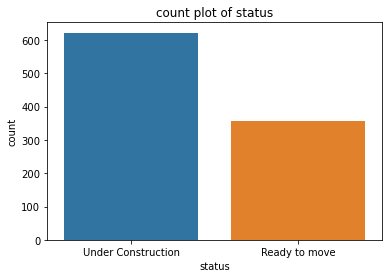

In [46]:
sns.countplot(df['status'])
plt.title('count plot of status')

In [47]:
df.status.value_counts()

Under Construction    622
Ready to move         358
Name: status, dtype: int64

Observation : The most of houses are under construction 

Text(0.5, 1.0, 'count plot on BHK')

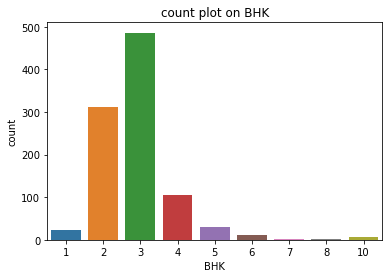

In [48]:
sns.countplot(df['BHK'])
plt.title('count plot on BHK')

The number of  3 BHK houses are more available

Text(0.5, 1.0, 'count plot on property_type')

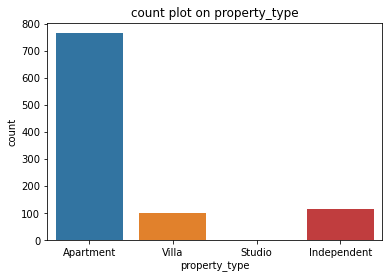

In [49]:
sns.countplot(df['property_type'])
plt.title('count plot on property_type')

most of the houses are apartment type

# 2.distribution plot

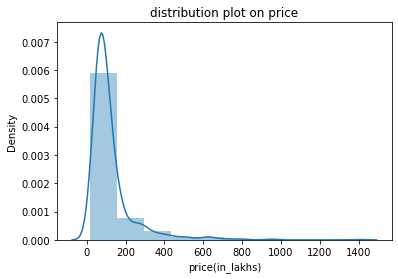

In [50]:
sns.distplot(df['price(in_lakhs)'],bins=10)
plt.title('distribution plot on price')
plt.show()

# 3.Box plot

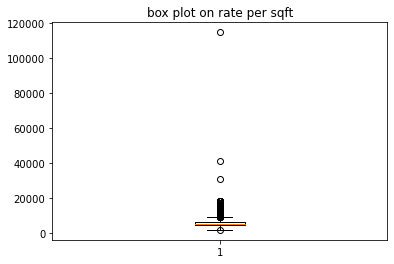

In [51]:
plt.boxplot(df['rate per sqft'])
plt.title('box plot on rate per sqft')
plt.show()

Observation: most of the values are spread between 0 and 20000

# 4.histogram

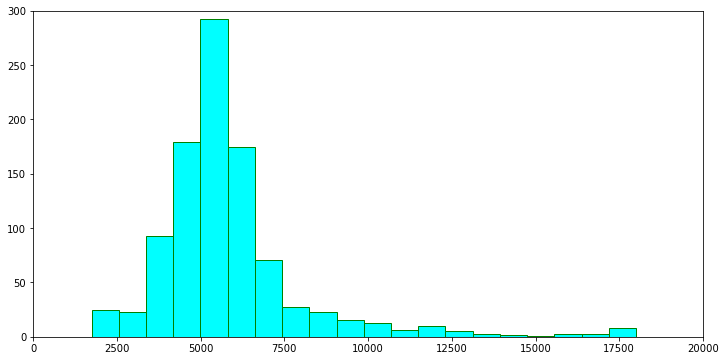

In [52]:
df_ratepersqft=df[df['rate per sqft']<20000]
plt.figure(figsize=(12,6))
plt.hist(df_ratepersqft['rate per sqft'],bins=20,color='cyan',edgecolor='green')
plt.xlim((0,20000))
plt.ylim((0,300))
plt.show()


Observation: most of houses have 6500 to 7500 rs/sqft

# 5.Pie chart

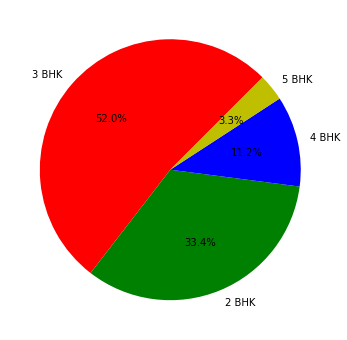

In [53]:
plt.figure(figsize=(12,6))
colors = ['r','g','b','y']
label=['3 BHK','2 BHK','4 BHK','5 BHK']
plt.pie(df['BHK'].value_counts().iloc[:4],labels=label,startangle=45,colors=colors,autopct='%1.1f%%')
plt.show()

Observation: above 50% houses are 3 BHK

# BIVARIATE ANALYSIS

In [54]:
pd.pivot_table(data=df,index=['property_type','BHK'],values=['price(in_lakhs)'])

price(in_lakhs)
property_type BHK                 
Apartment     1          31.487059
              2          57.835700
              3         104.910491
              4         202.781250
              5         388.666667
              6         370.000000
Independent   1          60.333333
              2         105.916667
              3         161.625000
              4         150.392857
              5         245.692308
              6         179.375000
              7         333.333333
              8         218.333333
              10        338.333333
Studio        1          26.740000
Villa         2         167.000000
              3         194.384615
              4         343.196721
              5         450.444444
              6         426.666667

# 1.Bar plot

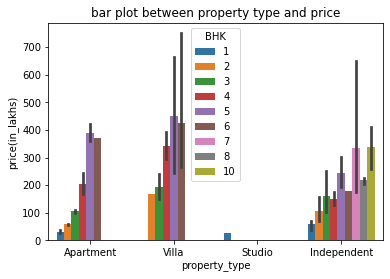

In [55]:
sns.barplot(x='property_type',y='price(in_lakhs)',hue="BHK",data=df)
plt.title('bar plot between property type and price')
plt.show()

Observation : Villa with 6 BHK has more price nearly 500 lakhs(50 cr)
              

# 2.Line chart

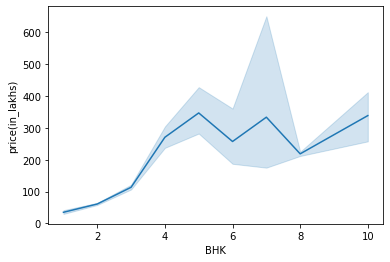

In [56]:
sns.lineplot(x='BHK',y='price(in_lakhs)',data=df)
plt.show()

# 3.scatter plot

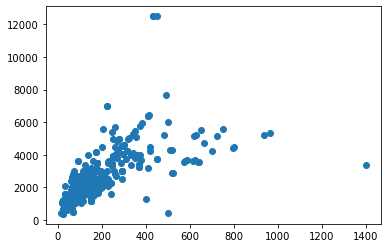

In [57]:
plt.scatter(x='price(in_lakhs)',y='area',data=df)
plt.show()

Observation : price and area are highly positively correlated

# 4.pair plot

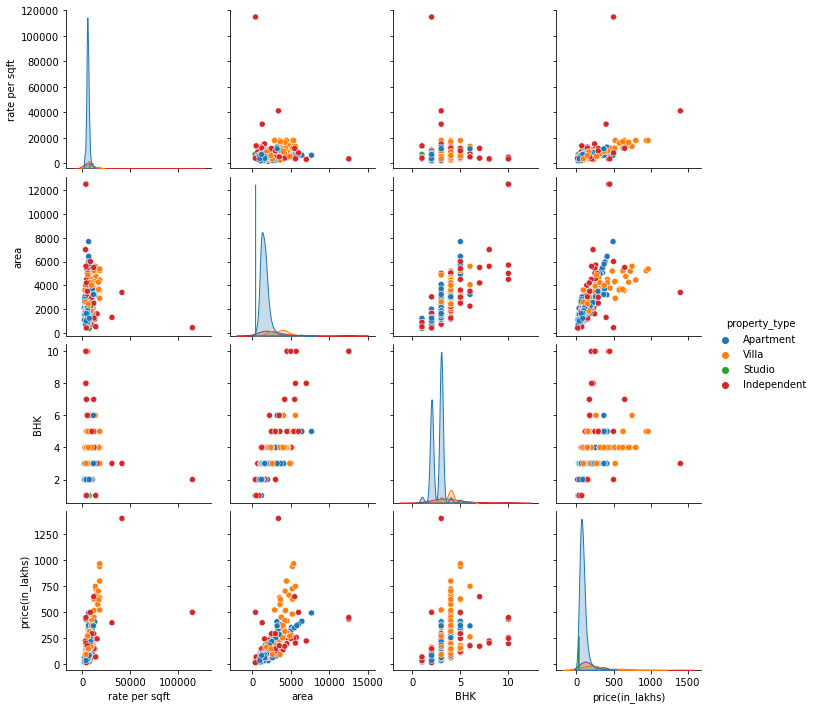

In [58]:
sns.pairplot(data=df,hue='property_type')
plt.show()

# comparing prices in some perticular locations

In [64]:
loc=df['location'].value_counts()[0:10]

In [65]:
loc.index

Index(['Mallampet', 'Manikonda', 'Kollur', 'Bachupally', 'Tellapur', 'Miyapur',
       'Tukkuguda', 'Kukatpally', 'Narsingi', 'Kondapur'],
      dtype='object')

In [66]:
df_loc=df[(df['location'].isin(loc.index))]

In [68]:
df_loc.shape

(377, 10)

In [69]:
df_loc['location'].value_counts().to_frame()

,location
Mallampet,67
Manikonda,66
Kollur,46
Bachupally,34
Tellapur,29
Miyapur,28
Tukkuguda,28
Kukatpally,27
Narsingi,26
Kondapur,26


<AxesSubplot:>

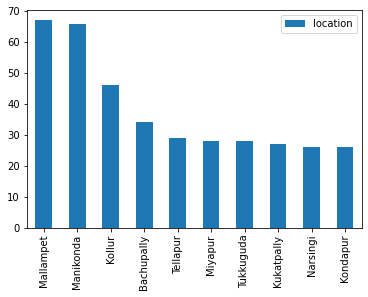

In [70]:
df_loc['location'].value_counts().to_frame().plot(kind='bar')

In [71]:
pd.pivot_table(data=df_loc,index=['location','BHK'],values=['rate per sqft'])

rate per sqft
location   BHK               
Bachupally 2      4777.411765
           3      5258.600000
           4      7000.000000
Kollur     2      4555.916667
           3      4956.575758
           4      3500.000000
Kondapur   2      5887.444444
           3      7301.866667
           4     10052.000000
           6     13392.000000
Kukatpally 1     10644.333333
           2      7522.000000
           3      6296.083333
           4      5714.000000
           5      5777.000000
           6      5471.375000
Mallampet  2      4931.133333
           3      4938.461538
Manikonda  2      6005.550000
           3      6124.282609
Miyapur    1      3555.000000
           2      5528.181818
           3      5952.562500
Narsingi   2      6883.000000
           3      7782.750000
           4     15536.200000
           5     18000.000000
Tellapur   2      5551.000000
           3      6644.250000
           4      7629.444444
           5      6450.000000
Tukkuguda  1      4549.000000
           2      4550.500000
           3      4549.285714
           4      6500.000000

Text(0.5, 1.0, 'Bar plot Representation of locations')

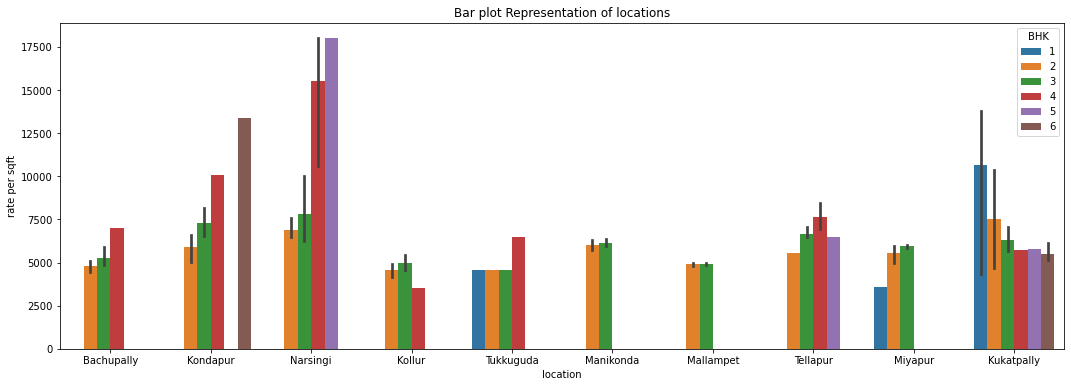

In [78]:
#rate per sqft with BHK based on locations
plt.figure(figsize=(18,6))
sns.barplot(x='location', y='rate per sqft',hue='BHK' ,data=df_loc)
plt.title('Bar plot Representation of locations')

observation : houses in Narsingi are more costly

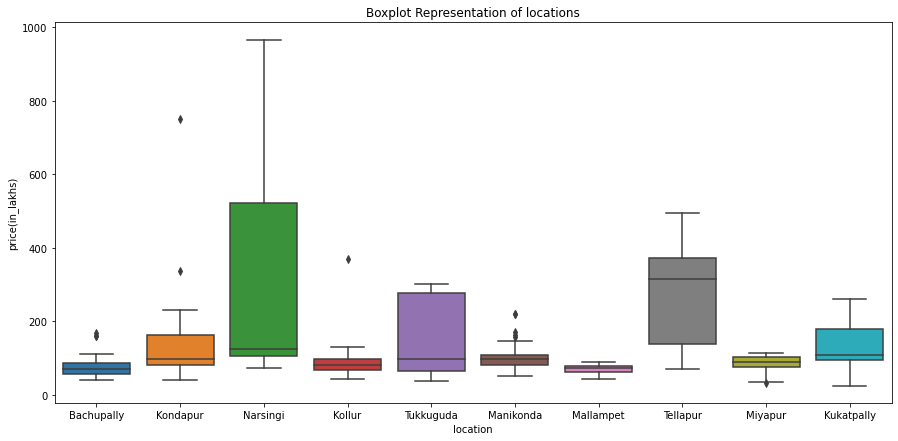

In [73]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_loc,x='location',y='price(in_lakhs)')
plt.title('Boxplot Representation of locations')
plt.show()

 Observation : we can observe max and min cost of houses at each location

In [74]:
pd.pivot_table(data=df_loc,index=['location','property_type'],values=['price(in_lakhs)'])

price(in_lakhs)
location   property_type                 
Bachupally Apartment            69.320645
           Villa               163.000000
Kollur     Apartment            81.244000
           Villa               370.000000
Kondapur   Apartment           121.385200
           Villa               750.000000
Kukatpally Apartment           100.472000
           Independent         163.250000
Mallampet  Apartment            70.230149
Manikonda  Apartment           101.630455
Miyapur    Apartment            84.564286
Narsingi   Apartment           110.963333
           Villa               729.250000
Tellapur   Apartment           237.950000
           Independent         269.333333
           Villa               343.166667
Tukkuguda  Apartment            69.156875
           Villa               279.000000

# Relation plot:

<Figure size 432x288 with 0 Axes>

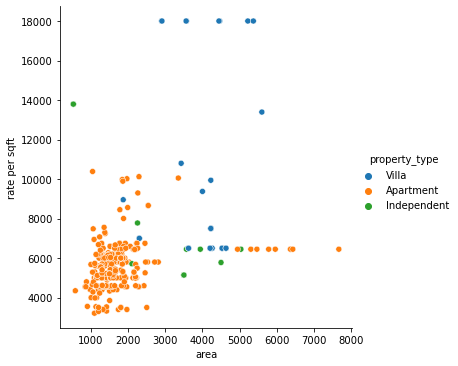

In [75]:
plt.figure(figsize=(6,4))
sns.relplot(x="area",y="rate per sqft",color='k',hue='property_type',data=df_loc)

# heatmap:

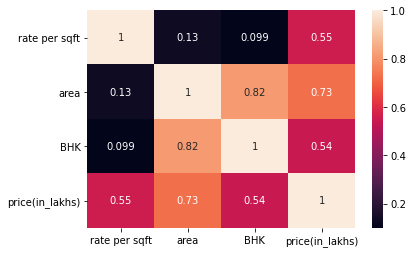

In [67]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [68]:
df.corr()

,rate per sqft,area,BHK,price(in_lakhs)
rate per sqft,1.000000,0.133092,0.099395,0.553890
area,0.133092,1.000000,0.815617,0.725857
BHK,0.099395,0.815617,1.000000,0.542736
price(in_lakhs),0.553890,0.725857,0.542736,1.000000


# comparing rate by seller

In [69]:
df_loc['seller'].value_counts().to_frame()

,seller
seller,145
EAPL Group,64
Anuhar Homes Pvt Ltd,40
Riddhi Group,32
Risinia Builders,20
M Kartheek,19
Ramky Estates Farms Ltd,16
Signature Avenues,10
Vessella Group,8
GHR Infra,7


<AxesSubplot:>

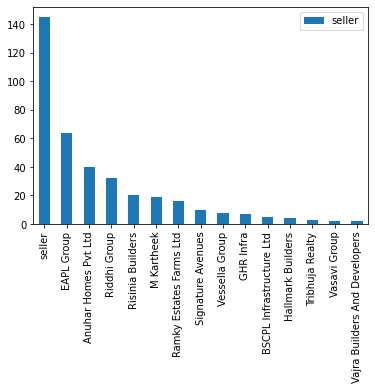

In [70]:
df_loc['seller'].value_counts().to_frame().plot(kind='bar')

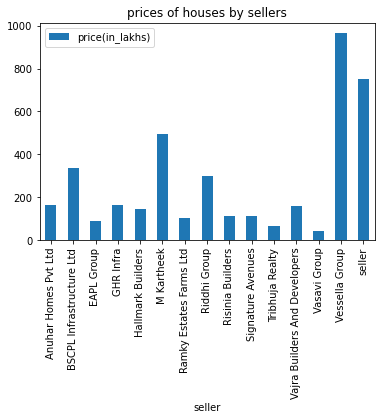

In [71]:
df_loc.groupby('seller')['price(in_lakhs)'].max().to_frame().plot(kind='bar')
plt.title('prices of houses by sellers')
plt.show()

Observation : the 'Vessella Group' is selling the houses for more prices

In [72]:
df_loc.groupby('seller')['property_type'].unique().to_frame()

,property_type
seller,
Anuhar Homes Pvt Ltd,[Apartment]
BSCPL Infrastructure Ltd,[Apartment]
EAPL Group,[Apartment]
GHR Infra,[Apartment]
Hallmark Builders,[Apartment]
M Kartheek,"[Apartment, Independent]"
Ramky Estates Farms Ltd,[Apartment]
Riddhi Group,"[Apartment, Villa]"
Risinia Builders,[Apartment]


# Bubble plot:

Text(0.5, 1.0, 'Bubble plot of area / rate per sqft of sellers in locations')

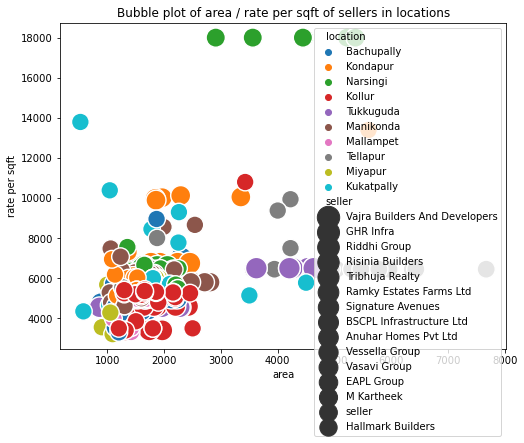

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='area', y='rate per sqft',size='seller', hue='location',sizes=(300,500),alpha=1.0,
                data=df_loc)
plt.title('Bubble plot of area / rate per sqft of sellers in locations')